# **Deep Learning** _Day 115_
##### Name: Muhammad Hassaan
##### Date: August 25, 2024
##### Email: muhammadhassaan7896@gmail.com

# **Convolutional Neural Networks (CNN) with MNIST Dataset**

## Introduction

`Convolutional Neural Networks (CNNs)` are a class of deep learning models that have proven highly effective for tasks involving image recognition and processing. Unlike traditional neural networks, CNNs can automatically detect and learn spatial hierarchies of features from images. This makes them particularly well-suited for analyzing visual data.

In this notebook, we will explore the basic concepts of CNNs and apply them to the MNIST dataset—a collection of 70,000 grayscale images of handwritten digits (0-9).

## Key Concepts

### 1. **Convolutional Layer**
   - **Purpose:** The convolutional layer is the core building block of a CNN. It applies a set of filters (also known as kernels) to the input image, which allows the network to extract different features such as edges, textures, and patterns.
   - **How it works:** Each filter slides (or convolves) over the input image, performing element-wise multiplication and summing the results to produce a feature map.

### 2. **ReLU Activation Function**
   - **Purpose:** The Rectified Linear Unit (ReLU) is an activation function applied after the convolution operation. It introduces non-linearity to the model, allowing it to learn complex patterns.
   - **How it works:** ReLU replaces all negative pixel values in the feature map with zero, keeping the positive values unchanged.

### 3. **Pooling Layer**
   - **Purpose:** Pooling layers reduce the spatial dimensions (width and height) of the feature maps, making the model computationally efficient and more robust to variations in the input.
   - **Types:** The most common pooling technique is Max Pooling, which selects the maximum value from each patch of the feature map.
  
### 4. **Fully Connected Layer**
   - **Purpose:** After the convolutional and pooling layers, the output is flattened and passed through one or more fully connected (dense) layers. This allows the model to combine the features extracted by the convolutional layers to make final predictions.
   - **How it works:** Each neuron in the fully connected layer is connected to every neuron in the previous layer.

### 5. **Softmax Layer**
   - **Purpose:** The softmax layer is typically the final layer in a CNN used for classification tasks. It converts the output from the fully connected layer into probability scores for each class.
   - **How it works:** Softmax normalizes the outputs to a probability distribution, where the sum of all probabilities equals one.

## Applying CNN to MNIST Dataset

1. **Loading the Dataset**
   - The MNIST dataset is available in Keras and can be easily loaded. It contains 60,000 training images and 10,000 test images of handwritten digits.
  
2. **Data Preprocessing**
   - Images are resized to 28x28 pixels and normalized by dividing the pixel values by 255, scaling them between 0 and 1.
   - Labels are one-hot encoded to prepare them for the softmax output layer.

3. **Model Architecture**
   - We will design a simple CNN architecture with the following layers:
     1. **Convolutional Layer:** 32 filters, kernel size 3x3, ReLU activation.
     2. **Max Pooling Layer:** Pool size 2x2.
     3. **Convolutional Layer:** 64 filters, kernel size 3x3, ReLU activation.
     4. **Max Pooling Layer:** Pool size 2x2.
     5. **Flatten Layer**
     6. **Fully Connected Layer:** 128 neurons, ReLU activation.
     7. **Output Layer:** 10 neurons (one for each digit), Softmax activation.

4. **Model Compilation**
   - The model is compiled using the Adam optimizer, categorical crossentropy as the loss function, and accuracy as the evaluation metric.

5. **Training the Model**
   - The model is trained on the training dataset with a validation split. The training process involves iterating through the dataset multiple times (epochs), updating the model's weights to minimize the loss.

6. **Model Evaluation**
   - After training, the model is evaluated on the test dataset to determine its accuracy in classifying unseen images.

7. **Visualization of Results**
   - We will visualize some of the predictions made by the model, comparing the predicted labels with the true labels to assess the model's performance.

## Conclusion

CNNs are powerful tools for image recognition tasks, capable of learning complex patterns from raw pixel data. By applying CNNs to the MNIST dataset, we can achieve high accuracy in classifying handwritten digits, demonstrating the effectiveness of this approach in real-world applications.

---

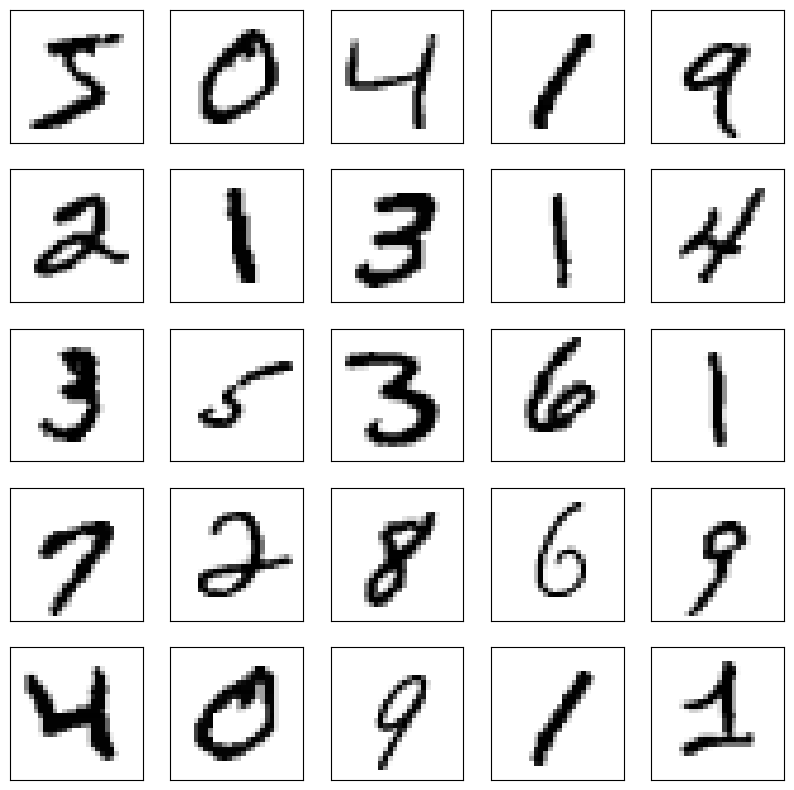

In [65]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# load the mnist data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# display some images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [66]:
# explore the data 
print(f"We have {len(X_test)} images in the training set and {len(x_test)} images in the test set.")
print(f"The size of the image is {X_train[0].shape}.")

We have 10000 images in the training set and 10000 images in the test set.
The size of the image is (28, 28).


In [67]:
X_train.shape

(60000, 28, 28)

In [68]:
y_train.shape

(60000,)

In [69]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

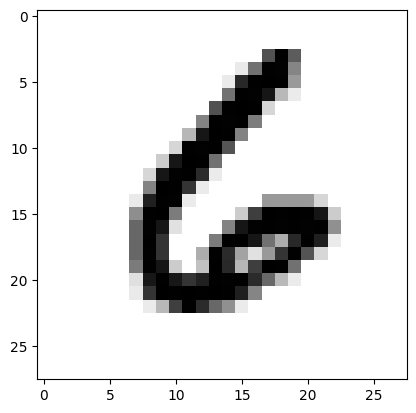

In [70]:
# display and image 
plt.imshow(X_train[5593], cmap=plt.cm.binary)

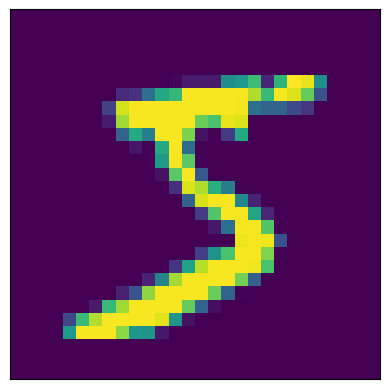

Pixel Values of given Image:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247

In [71]:
# display any image  from the dataset as a data matrix
plt.imshow(X_train[0], cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.show()

# display the value of each pixel in the image
print("Pixel Values of given Image:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [72]:
# change the datatype to float32 (Data Normalization)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Pixel Values After Normalization:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0117647061124444 0.07058823853731155 0.07058823853731155 0.07058823853731155 0.4941176474094391 0.5333333611488342 0.686274528503418 0.10196078568696976 0.6509804129600525 1.0 0.9686274528503418 0.49803921580314636 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.11764705926179886 0.1411764770746231 0.3686274588108063 0.6039215922355652 0.66666668

<Figure size 640x480 with 0 Axes>

<Axes: >

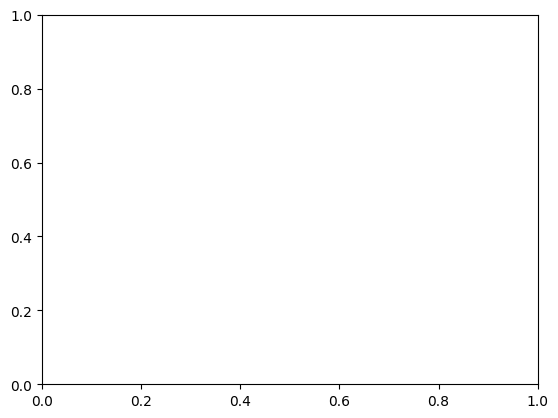

In [73]:
# display the value of each pixel in the image after normalization
print("Pixel Values After Normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

# reshape the images to have a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# display the complete output of the cell
display(plt.gcf())
display(plt.gca())

## **Build the Model**

In [74]:
import tensorflow as tf 
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28X28 pixel images with a single color channel

# Build the CNN model
model = tf.keras.models.Sequential([
    input_layer, # input layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'), # convolutional layer
    # filter is the number of filter we want to apply
    # kernel_size is the size of the filter
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer

    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer

    tf.keras.layers.Flatten(), # flatten layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [77]:
%%time
# train the model 
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.7443 - loss: 0.7981 - val_accuracy: 0.9662 - val_loss: 0.1225
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9625 - loss: 0.1203 - val_accuracy: 0.9757 - val_loss: 0.0865
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9737 - loss: 0.0834 - val_accuracy: 0.9789 - val_loss: 0.0755
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9792 - loss: 0.0676 - val_accuracy: 0.9780 - val_loss: 0.0743
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9807 - loss: 0.0604 - val_accuracy: 0.9827 - val_loss: 0.0597
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9830 - loss: 0.0535 - val_accuracy: 0.9843 - val_loss: 0.0555
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9859 - loss: 0.0475 - val_accuracy: 0.9835 - val_loss: 0.0579
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.9872 - loss: 0.0414 - 

In [78]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", {test_acc})
print("Loss Accuracy:", {test_loss})

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9855 - loss: 0.0523
Test accuracy: {0.9879999756813049}
Loss Accuracy: {0.043235164135694504}


In [79]:
# save the model
model.save('./models/cnn_model.keras')

In [90]:
# grab an image
img = X_test[6096]
print(img.shape)

# display the image
img = img.reshape((28,28,1))
print(img.shape)

(28, 28, 1)
(28, 28, 1)


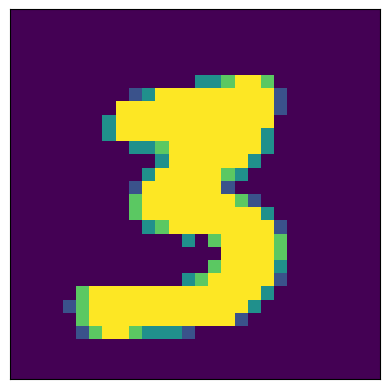

In [91]:
# print the image 
plt.imshow(img, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.show()

In [92]:
# predict the image 
pred = model.predict(img.reshape(1, 28, 28, 1))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[[2.0917822e-18 2.1942224e-11 4.6444190e-17 9.9999988e-01 4.8833991e-16
  1.5601479e-07 2.4957758e-24 2.1269677e-12 4.8711432e-14 2.0892825e-10]]


In [93]:
print(pred[:8])

[[2.0917822e-18 2.1942224e-11 4.6444190e-17 9.9999988e-01 4.8833991e-16
  1.5601479e-07 2.4957758e-24 2.1269677e-12 4.8711432e-14 2.0892825e-10]]


In [94]:
print(f"The model predicts that this image is a {pred.argmax()}.")

The model predicts that this image is a 3.
